<a href="https://colab.research.google.com/github/willystumblr/AI-ML_Team_5/blob/kms/Week4/NLP_Week_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [3]:
#!pip install tensorflow==2.5.0

In [4]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [5]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

# Terms
* corpus: dataset을 NLP에서 지칭하는 말


In [6]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [7]:
print(xs)

[[  0   0   0 ...   0   0   4]
 [  0   0   0 ...   0   4   2]
 [  0   0   0 ...   4   2  66]
 ...
 [  0   0   0 ...  61  60 262]
 [  0   0   0 ...  60 262  13]
 [  0   0   0 ... 262  13   9]]


# Looking into codes
* `xs, labels = input_sequences[:, :-1]`: It is list indexing, it returns all elements `[:]` except the last one -1.

# N-gram 언어 모델
n-gram 언어 모델은 여전히 카운트에 기반한 통계적 접근을 사용하고 있으므로 SLM의 일종입니다. 다만, 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어만 고려하는 접근 방법을 사용합니다. 그리고 이때 일부 단어를 몇 개 보느냐를 결정하는데 이것이 n-gram에서의 n이 가지는 의미입니다.

SLM의 한계는 훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다는 점입니다. 그리고 확률을 계산하고 싶은 문장이 길어질수록 갖고있는 코퍼스에서 그 문장이 존재하지 않을 가능성이 높습니다. 다시 말하면 카운트할 수 없을 가능성이 높습니다. 그런데 다음과 같이 참고하는 단어들을 줄이면 카운트를 할 수 있을 가능성이 높일 수 있습니다.

𝑃(is|An adorable little boy) ≈ 𝑃(is|little boy)

즉, 앞에서는 An adorable little boy가 나왔을 때 is가 나올 확률을 구하기 위해서는 An adorable little boy가 나온 횟수와 An adorable little boy is가 나온 횟수를 카운트해야만 했지만, **이제는 단어의 확률을 구하고자 기준 단어의 앞 단어를 전부 포함해서 카운트하는 것이 아니라, 앞 단어 중 임의의 개수만 포함해서 카운트하여 근사하자는 것입니다.** 이렇게 하면 갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률이 높아집니다.

이때 임의의 개수를 정하기 위한 기준을 위해 사용하는 것이 n-gram입니다. n-gram은 n개의 연속적인 단어 나열을 의미합니다. 갖고 있는 코퍼스에서 n개의 단어 뭉치 단위로 끊어서 이를 하나의 토큰으로 간주합니다. 예를 들어서 문장 An adorable little boy is spreading smiles이 있을 때, 각 n에 대해서 n-gram을 전부 구해보면 다음과 같습니다.
* **unigrams** : an, adorable, little, boy, is, spreading, smiles
* **bigrams** : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
* **trigrams** : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
* **4-grams** : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존합니다. 예를 들어 'An adorable little boy is spreading' 다음에 나올 단어를 예측하고 싶다고 할 때, n=4라고 한 4-gram을 이용한 언어 모델을 사용한다고 합시다. 이 경우, spreading 다음에 올 단어를 예측하는 것은 n-1에 해당되는 앞의 3개의 단어만을 고려합니다.

![image.png](https://wikidocs.net/images/page/21692/n-gram.PNG)

출처: [여기](https://wikidocs.net/21692)

# `tf.keras.utils.to_categorical`
1. use
```
tf.keras.utils.to_categorical(
    y, num_classes=None, dtype='float32'
)
```
2. role
- Converts a class vector (integers) to binary class matrix.

In [8]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])
print(tokenizer.word_index['cheeks'])

4
2
66
8
67
68
69
70
208


In [9]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [10]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# One-hot encoding
원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식입니다. 이렇게 표현된 벡터를 원-핫 벡터(One-Hot vector)라고 합니다.

In [11]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [13]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)


Epoch 1/500
15/15 [==============================] - 4s 10ms/step - loss: 5.5676 - accuracy: 0.0155
Epoch 2/500
15/15 [==============================] - 0s 10ms/step - loss: 5.5406 - accuracy: 0.0574
Epoch 3/500
15/15 [==============================] - 0s 9ms/step - loss: 5.4831 - accuracy: 0.0419
Epoch 4/500
15/15 [==============================] - 0s 10ms/step - loss: 5.3371 - accuracy: 0.0331
Epoch 5/500
15/15 [==============================] - 0s 9ms/step - loss: 5.1424 - accuracy: 0.0397
Epoch 6/500
15/15 [==============================] - 0s 10ms/step - loss: 5.0706 - accuracy: 0.0442
Epoch 7/500
15/15 [==============================] - 0s 9ms/step - loss: 5.0312 - accuracy: 0.0596
Epoch 8/500
15/15 [==============================] - 0s 10ms/step - loss: 4.9932 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 0s 10ms/step - loss: 4.9623 - accuracy: 0.0508
Epoch 10/500
15/15 [==============================] - 0s 10ms/step - loss: 4.9241 - accuracy: 0.0662
Ep

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

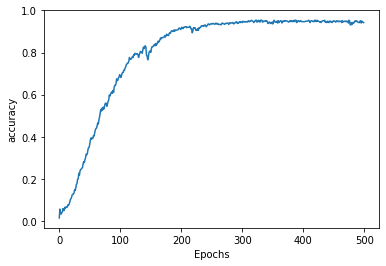

In [15]:
plot_graphs(history, 'accuracy')


In [16]:
print(tokenizer.word_index.items())
for word, index in tokenizer.word_index.items():
  print(word)
  print(index)

dict_items([('and', 1), ('the', 2), ('a', 3), ('in', 4), ('all', 5), ('i', 6), ('for', 7), ('of', 8), ('lanigans', 9), ('ball', 10), ('were', 11), ('at', 12), ('to', 13), ('she', 14), ('stepped', 15), ('his', 16), ('girls', 17), ('as', 18), ('they', 19), ('til', 20), ('he', 21), ('again', 22), ('got', 23), ('boys', 24), ('round', 25), ('that', 26), ('her', 27), ('there', 28), ('three', 29), ('weeks', 30), ('up', 31), ('out', 32), ('him', 33), ('was', 34), ('spent', 35), ('learning', 36), ('new', 37), ('steps', 38), ('long', 39), ('away', 40), ('left', 41), ('friends', 42), ('relations', 43), ('when', 44), ('wall', 45), ('myself', 46), ('nice', 47), ('just', 48), ('dancing', 49), ('merry', 50), ('tipped', 51), ('me', 52), ('soon', 53), ('time', 54), ('old', 55), ('their', 56), ('them', 57), ('danced', 58), ('dublin', 59), ('an', 60), ('put', 61), ('leg', 62), ('miss', 63), ('fainted', 64), ('from', 65), ('town', 66), ('athy', 67), ('one', 68), ('jeremy', 69), ('lanigan', 70), ('battered

In [17]:
seed_text = "Laurence went to dublin"
next_words = 10

  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		for i in predicted:
			if index == i.any:
				output_word = word
				break
			break
	seed_text += " " + output_word
print(seed_text)

Laurence went to dublin          


??????? 웨 않되?